In [2]:
import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
df_iris = pd.read_csv('Datasets/iris.csv')

df_iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
20,5.4,3.4,1.7,0.2,Setosa
106,4.9,2.5,4.5,1.7,Virginica
4,5.0,3.6,1.4,0.2,Setosa
95,5.7,3.0,4.2,1.2,Versicolor
1,4.9,3.0,1.4,0.2,Setosa


In [4]:
#prepare the data
X = df_iris.iloc[:,0:4]
 
#prepare the target
y = df_iris.iloc[:,4]



In [5]:
# Elbow Method

wcss = [] # Within Cluster Sum of Squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


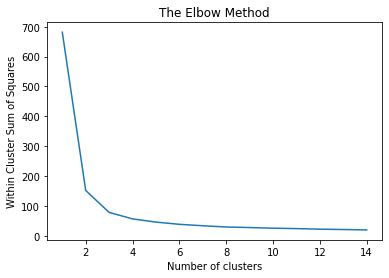

In [6]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

In [7]:
x = X

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


df_iris['Prediction'] = y_kmeans

df_iris['Prediction'].replace({
                                0  : 'Versicolor',
                                1  : 'Setosa',
                                2  : 'Virginica'
                                } , inplace = True)

df_iris.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety,Prediction
60,5.0,2.0,3.5,1.0,Versicolor,Versicolor
3,4.6,3.1,1.5,0.2,Setosa,Setosa
31,5.4,3.4,1.5,0.4,Setosa,Setosa
109,7.2,3.6,6.1,2.5,Virginica,Virginica
20,5.4,3.4,1.7,0.2,Setosa,Setosa


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Versicolor'), Text(0, 2.5, 'Virginica')]

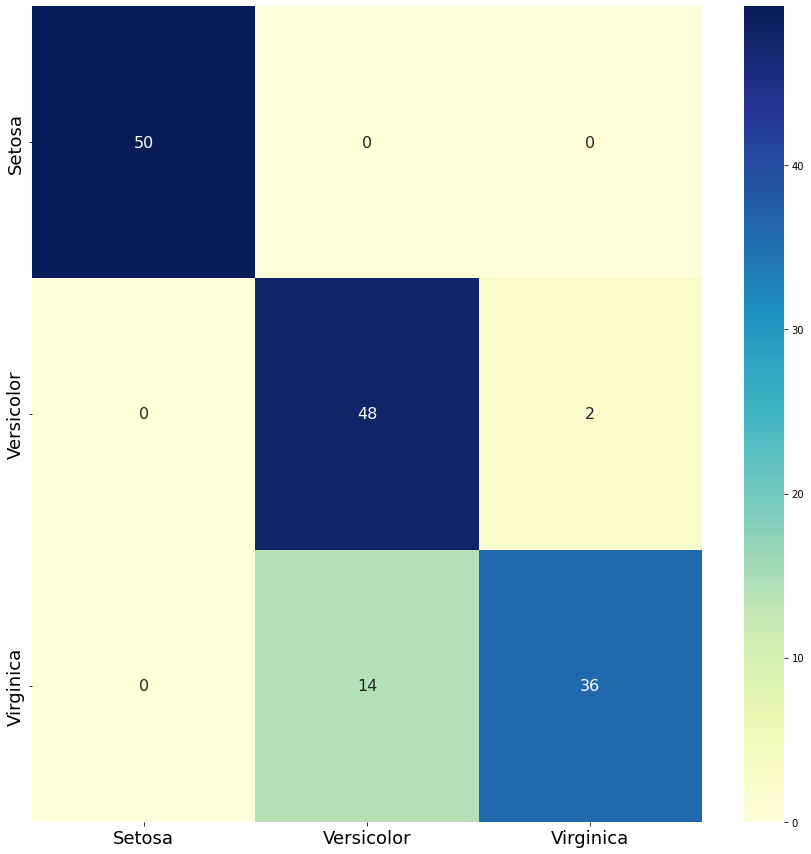

In [18]:
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize = (15,15))

#Get the confusion matrix
cf_matrix = confusion_matrix(df_iris['variety'], df_iris['Prediction'])

import seaborn as sns
res = sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", 
            robust=True, annot_kws={"size": 16}, 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'], 
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)